## The Quantization of the image

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def uniform_quantization(image, num_levels):
    """
    Perform uniform quantization on an image.

    Returns:
        quantized_image (numpy array): Quantized image array.
        step_size (float): Step size used for quantization.
    """
    image = np.asarray(image, dtype=np.float32)  

    
    img_min, img_max = np.min(image), np.max(image)

 
    step_size = (img_max - img_min) / num_levels

    # Perform quantization
    quantized_image = np.floor((image - img_min) / step_size) * step_size + img_min

    return quantized_image, step_size

## Dequantization of the Image

In [3]:
def decompress_image(quantized_image, step_size):
    """
    Decompress a quantized image by reversing the quantization step.


    Returns:
        decompressed_image (numpy array): Decompressed image array.
    """
    decompressed_image = quantized_image + (step_size / 2)
    return np.clip(decompressed_image, 0, 255).astype(np.uint8)

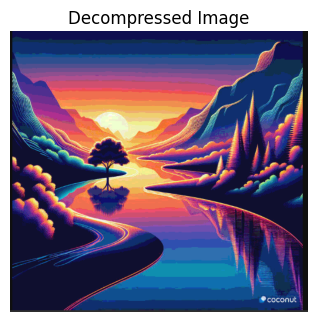

In [ ]:
if __name__ == "__main__":
   
    image = Image.open(r"C:\Users\LENOVO\Pictures\Screenshots\compreesion.png")  
    image_array = np.array(image)

    num_levels = 8  

    # Compress (quantize) the image
    quantized_image, step_size = uniform_quantization(image_array, num_levels)

    # Decompress the image
    decompressed_image = decompress_image(quantized_image, step_size)

    
    #plt.figure(figsize=(10, 5))

    # Original image
    #plt.subplot(1, 2, 1)
    #plt.title("Original Image")
    #plt.imshow(image_array, cmap="gray")
    #plt.axis("off")

    # Decompressed image
    plt.subplot(1, 2, 2)
    plt.title("Decompressed Image")
    plt.imshow(decompressed_image, cmap="gray")
    plt.axis("off")

    plt.tight_layout()
    plt.show()
